# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy
!conda install -c conda-forge gmaps
!jupyter nbextension enable --py gmaps


Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base conda


Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [2]:
# Dependencies
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
from citipy import citipy
import gmaps
import gmaps.datasets
import numpy as np

# Citipy & gmaps API Keys
from api_keys import (weather_api_key, gkey)

# Configure gmaps
gmaps.configure(api_key=gkey)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lon = []
cities = []

# Create a set of random lat and lon combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lon = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name_list = []
city_id_list =[]
country_list = []
lat_list = []
lon_list = []

cloudiness_list = []
date_list = []
humidity_list = []
date_temp_list = []
max_temp_list = []
wind_speed_list = []

index_counter = 0


In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()

        city_name_list.append(response["name"])
        city_id_list.append(response["id"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lon_list.append(response["coord"]["lon"])
        date_temp_list.append(response['main']['temp'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 : cape town
City not found. Skipping...
Processing Record 2 : rikitea
Processing Record 3 : busselton
Processing Record 4 : upernavik
Processing Record 5 : margate
Processing Record 6 : kodinsk
Processing Record 7 : key largo
Processing Record 8 : victoria
Processing Record 9 : kagadi
Processing Record 10 : hilo
Processing Record 11 : georgetown
Processing Record 12 : tuktoyaktuk
Processing Record 13 : ambovombe
Processing Record 14 : ayan
Processing Record 15 : cidreira
Processing Record 16 : mataura
Processing Record 17 : bluff
Processing Record 18 : butaritari
Processing Record 19 : jemnice
Processing Record 20 : safaga
Processing Record 21 : saint george
Processing Record 22 : cuiluan
Processing Record 23 : naze
Processing Record 24 : tavda
Processing Record 25 : motozintla
City not found. Skipping...
Processing Record 26 : kahului
Processing Record 27 : port elizabeth
Processing Record 28 : chokurdakh
Proc

Processing Record 233 : thompson
Processing Record 234 : porto belo
Processing Record 235 : aksaray
Processing Record 236 : lorengau
Processing Record 237 : pevek
Processing Record 238 : caravelas
Processing Record 239 : saldanha
Processing Record 240 : manado
Processing Record 241 : cherskiy
Processing Record 242 : kupang
Processing Record 243 : kemin
Processing Record 244 : abu samrah
Processing Record 245 : warri
Processing Record 246 : straumen
Processing Record 247 : port lincoln
Processing Record 248 : harper
Processing Record 249 : dikson
City not found. Skipping...
Processing Record 250 : waddan
Processing Record 251 : lakatoro
Processing Record 252 : seymchan
Processing Record 253 : soyo
Processing Record 254 : cerrito
Processing Record 255 : kudahuvadhoo
Processing Record 256 : teguldet
Processing Record 257 : farah
City not found. Skipping...
Processing Record 258 : olafsvik
Processing Record 259 : sabang
Processing Record 260 : the valley
Processing Record 261 : kavieng
Pro

Processing Record 457 : praya
Processing Record 458 : tsogni
Processing Record 459 : imeni poliny osipenko
Processing Record 460 : beloha
Processing Record 461 : salamanca
Processing Record 462 : ewa beach
Processing Record 463 : airai
Processing Record 464 : makat
Processing Record 465 : manggar
Processing Record 466 : san cristobal
Processing Record 467 : katobu
Processing Record 468 : sergeyevka
Processing Record 469 : irbil
Processing Record 470 : vallenar
Processing Record 471 : formosa do rio preto
Processing Record 472 : bell ville
Processing Record 473 : ilesha
Processing Record 474 : bousse
Processing Record 475 : vitim
Processing Record 476 : lahaina
Processing Record 477 : boueni
Processing Record 478 : hofn
Processing Record 479 : awjilah
Processing Record 480 : challapata
Processing Record 481 : bonthe
Processing Record 482 : weatherford
Processing Record 483 : soma
Processing Record 484 : yemelyanovo
Processing Record 485 : niquero
Processing Record 486 : floro
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_cities = pd.DataFrame({ 
                "City" : city_name_list,
                "City ID": city_id_list,
                "Country" : country_list,
                "Latitute" : lat_list,
                "Longitute" : lon_list,
                "Date" : date_list,
                "Cloudiness" : cloudiness_list,
                "Humidity" : humidity_list,
                "Temp at Date" : date_temp_list,
                "Max Temp to Date":max_temp_list, 
                "Wind Speed" : wind_speed_list })

weather_cities

,City,City ID,Country,Latitute,Longitute,Date,Cloudiness,Humidity,Temp at Date,Max Temp to Date,Wind Speed
0,Cape Town,3369157,ZA,-33.93,18.42,1603154131,20,93,56.07,57.99,5.82
1,Rikitea,4030556,PF,-23.12,-134.97,1603154339,0,76,74.41,74.41,11.10
2,Busselton,2075265,AU,-33.65,115.33,1603154219,0,48,65.86,69.01,10.25
3,Upernavik,3418910,GL,72.79,-56.15,1603154213,100,93,32.81,32.81,8.03
4,Margate,2643044,GB,51.38,1.39,1603154340,100,66,52.90,54.00,5.01
...,...,...,...,...,...,...,...,...,...,...,...
561,Sibolga,1213855,ID,1.74,98.78,1603154465,47,70,80.96,80.96,1.97
562,Edd,338345,ER,13.93,41.69,1603154232,0,72,82.42,82.42,2.86
563,Conceição do Araguaia,3401845,BR,-8.26,-49.26,1603154466,100,45,82.33,82.33,1.74
564,Dhidhdhoo,1337612,MV,6.88,73.10,1603154466,17,78,81.55,81.55,13.18


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_cities_underhumid100 = weather_cities.loc[(weather_cities["Humidity"] <= 100)]

weather_cities_underhumid100

,City,City ID,Country,Latitute,Longitute,Date,Cloudiness,Humidity,Temp at Date,Max Temp to Date,Wind Speed
0,Cape Town,3369157,ZA,-33.93,18.42,1603154131,20,93,56.07,57.99,5.82
1,Rikitea,4030556,PF,-23.12,-134.97,1603154339,0,76,74.41,74.41,11.10
2,Busselton,2075265,AU,-33.65,115.33,1603154219,0,48,65.86,69.01,10.25
3,Upernavik,3418910,GL,72.79,-56.15,1603154213,100,93,32.81,32.81,8.03
4,Margate,2643044,GB,51.38,1.39,1603154340,100,66,52.90,54.00,5.01
...,...,...,...,...,...,...,...,...,...,...,...
561,Sibolga,1213855,ID,1.74,98.78,1603154465,47,70,80.96,80.96,1.97
562,Edd,338345,ER,13.93,41.69,1603154232,0,72,82.42,82.42,2.86
563,Conceição do Araguaia,3401845,BR,-8.26,-49.26,1603154466,100,45,82.33,82.33,1.74
564,Dhidhdhoo,1337612,MV,6.88,73.10,1603154466,17,78,81.55,81.55,13.18


In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_cities_overhumid100 = weather_cities.loc[(weather_cities["Humidity"] > 100)]

weather_cities_overhumid100

,City,City ID,Country,Latitute,Longitute,Date,Cloudiness,Humidity,Temp at Date,Max Temp to Date,Wind Speed


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

quartiles = weather_cities_underhumid100["Humidity"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
        
weather_cities_cleandata = weather_cities_underhumid100 = weather_cities.loc[(weather_cities["Humidity"] > lower_bound)
                                                                             |(weather_cities["Humidity"] < upper_bound) ]
weather_cities_cleandata

# Save city data into a csv file
weather_cities_cleandata.to_csv("../output_data/cities.csv", index = False, header=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

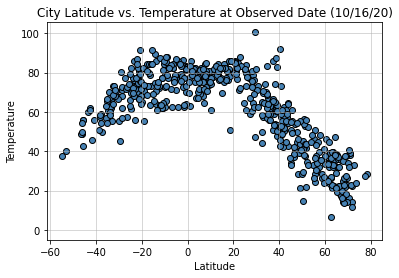

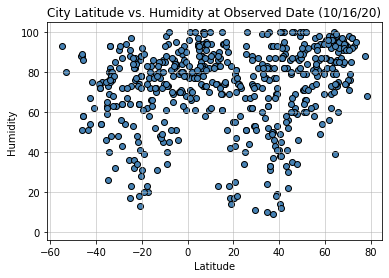

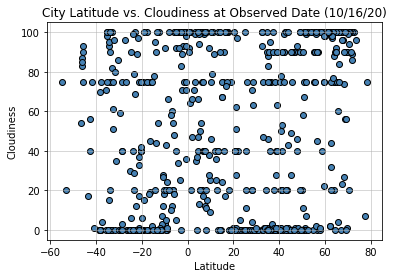

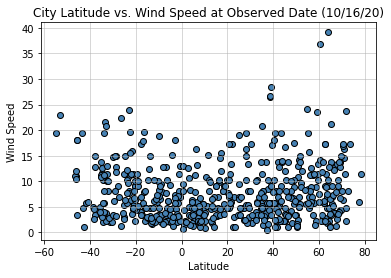

In [10]:
# loop to run plots of latitute vs Temperature, Humidity,Cloudiness & Wind Speed

x = weather_cities_cleandata["Latitute"]
y = [weather_cities_cleandata["Temp at Date"],weather_cities_cleandata["Humidity"],
     weather_cities_cleandata["Cloudiness"],weather_cities_cleandata["Wind Speed"]]
variable =["Temperature","Humidity","Cloudiness","Wind Speed"]

for n in range(len(y)):
        
        fig = plt.figure()  
        
        plt.scatter(x, y[n], facecolor = "steelblue", edgecolor = "black")
        
        # Set title
        plt.title(f"City Latitude vs. {variable[n]} at Observed Date (10/16/20)")

        # Set x axis label
        plt.xlabel("Latitude")

        # Set y axis label
        plt.ylabel(f"{variable[n]}")

        # Set grid line
        plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

        plt.plot(n)
        plt.show()
        
        # Save the plotted figure as .pngs
        fig.savefig("../Images/Graph" + " " + str(variable[n]) + " vs City Latitude" + ".png", format="PNG")
       

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [11]:
def linear_agression(x,y):
            print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
            (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
            regress_values = x * slope + intercept
            line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
            plt.scatter(x, y)
            plt.plot(x,regress_values,"r-")
            return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
            plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_cities_cleandata.loc[weather_cities_cleandata["Latitute"] >= 0,:]
southern_hemisphere = weather_cities_cleandata.loc[weather_cities_cleandata["Latitute"] < 0,:]

x = [northern_hemisphere["Latitute"],southern_hemisphere["Latitute"]]

y_north = [northern_hemisphere["Max Temp to Date"],northern_hemisphere["Humidity"],
           northern_hemisphere["Cloudiness"],northern_hemisphere["Wind Speed"]]

y_south = [southern_hemisphere["Max Temp to Date"],southern_hemisphere["Humidity"],
           southern_hemisphere["Cloudiness"],southern_hemisphere["Wind Speed"]]

variable_ln =["Max Temperature","Humidity","Cloudiness","Wind Speed"]

The r-squared is : -0.88


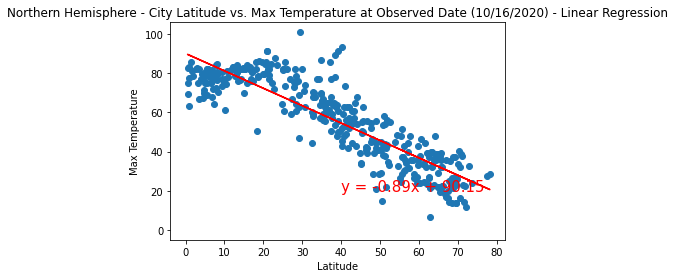

The r-squared is : 0.13


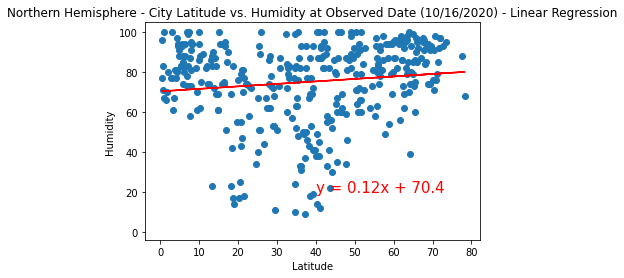

The r-squared is : 0.18


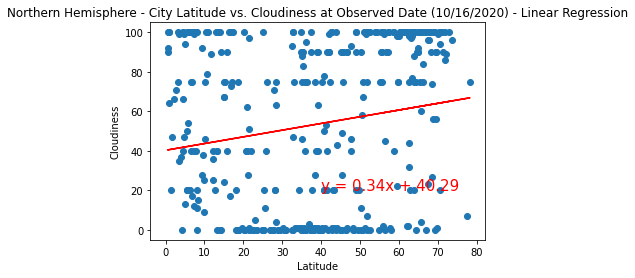

The r-squared is : 0.24


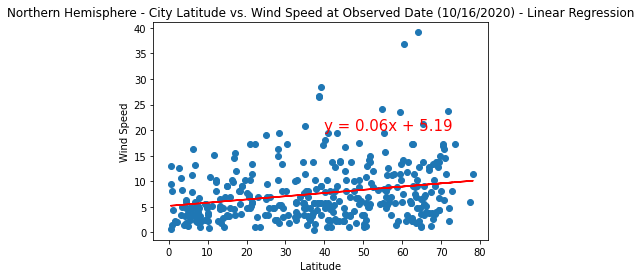

In [13]:
 for n in range(len(y_north)):
        
        fig = plt.figure()
        
        # Call an function #1
        equation = linear_agression(x[0], y_north[n])

        # Call an function #2
        annotate(equation, 40, 20)

        # Set a title
        plt.title(f"Northern Hemisphere - City Latitude vs. {variable_ln[n]} at Observed Date (10/16/2020) - Linear Regression")

        # Set xlabel
        plt.xlabel("Latitude")

        # Set ylabel
        plt.ylabel(f"{variable_ln[n]}")

        plt.plot(n)
        plt.show()

        # Save the figure
        fig.savefig("../Images/Linear Regression" + " " + str(variable_ln[n]) + " vs North_City Latitude" + ".png", format="PNG")

        
        

The r-squared is : 0.67


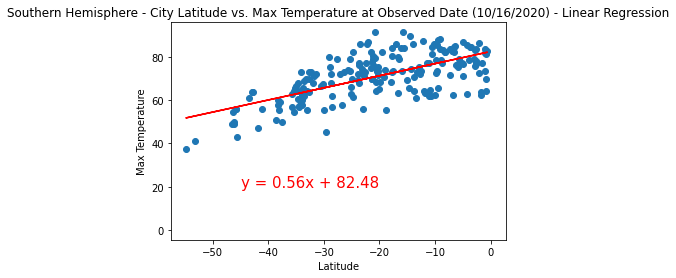

The r-squared is : 0.11


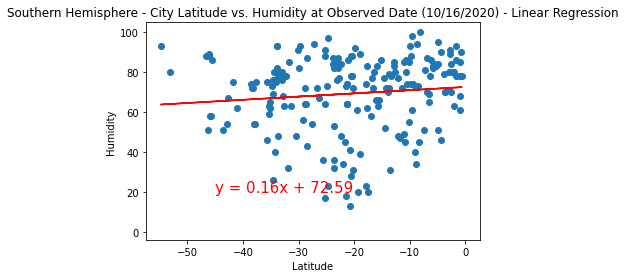

The r-squared is : 0.05


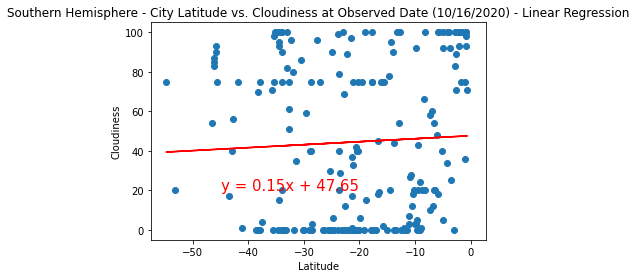

The r-squared is : -0.3


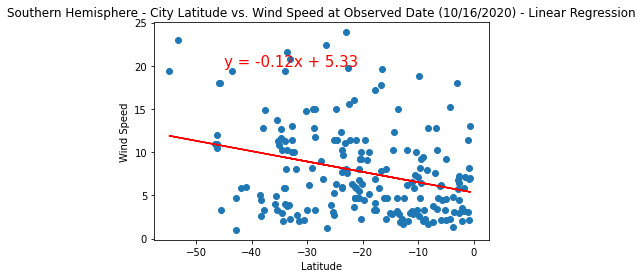

In [14]:
for n in range(len(y_north)):
        
        fig = plt.figure()
        
        # Call an function #1
        equation = linear_agression(x[1], y_south[n])

        # Call an function #2
        annotate(equation, -45, 20)

        # Set a title
        plt.title(f"Southern Hemisphere - City Latitude vs. {variable_ln[n]} at Observed Date (10/16/2020) - Linear Regression")

        # Set xlabel
        plt.xlabel("Latitude")

        # Set ylabel
        plt.ylabel(f"{variable_ln[n]}")

        plt.plot(n)
        plt.show()

        # Save the figure
        fig.savefig("../Images/Linear Regression" + " " + str(variable_ln[n]) + " vs South_City Latitude" + ".png", format="PNG")

        

In [15]:
print("COMMENT:")
print("-------------------------------------------------------------------------------------------------------------------------")
print(f"basing on r-squared and the slope of linear regression line: it can conluded that:")
print(f"                 ")
print(f"03 weather features: Humidity, Cloudiness & Wind Speed can not be explained by City latitues in both Hemispheres.")
print(f"their r-squares are very small or close to zero.")
print(f"                 ")
print(f"but Temperature can be strongly explained by City latitues in both Hemispheres.")
print(f"its r-squares are all over 0.7 in both Hemisphere, but it is higher for those of northern cities.")
print(f"                 ")
print(f"the sign of r-squares and slopes of linear regression are opposite between the North and the South.")
print(f"it means: when latitude increases, temperature decreases in cities of Northern Hemisphere but increases in cities of Southern Hemisphere.")
print(f"                 ")
print("-------------------------------------------------------------------------------------------------------------------------")

COMMENT:
-------------------------------------------------------------------------------------------------------------------------
basing on r-squared and the slope of linear regression line: it can conluded that:
                 
03 weather features: Humidity, Cloudiness & Wind Speed can not be explained by City latitues in both Hemispheres.
their r-squares are very small or close to zero.
                 
but Temperature can be strongly explained by City latitues in both Hemispheres.
its r-squares are all over 0.7 in both Hemisphere, but it is higher for those of northern cities.
                 
the sign of r-squares and slopes of linear regression are opposite between the North and the South.
it means: when latitude increases, temperature decreases in cities of Northern Hemisphere but increases in cities of Southern Hemisphere.
                 
-------------------------------------------------------------------------------------------------------------------------


#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression